## BLM22535 Makine Öğrenmesi HW3 

### Name: Ebrar SAHIN
### Student ID:

**1-** In this homework, you are expected to implement polynomial regression for given data, and find the best fitting line with order ($k$) using the method ```LinearRegression``` from the package ```scikit-learn```.

**2-** Show bias-variance trade-off (plot each case) and explain in detail.

**3-** Calculate predicted output for obtained order $k$ using this formula:
 
   - $\large \textbf{w'} = \left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}$

   - $\large \textbf{y'} = \textbf{X}\textbf{w'}$

and compare the results with previous results.

- **Hint:** Use pseudo-inverse of a matrix

In [ ]:
import numpy as np
import scipy.linalg

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import operator
from sklearn.metrics import mean_squared_error,r2_score

np.random.seed(seed=21)

# ignore warnings
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [ ]:
df=pd.read_csv("Data.csv")
df
x = df.iloc[:,0].to_numpy().reshape((100, 1))
y = df.iloc[:,1].to_numpy().reshape((100, 1))

RMSE of degree  1 :  371.2962143885946 *** R2 score of degree  1 :  0.3086874685884061
RMSE of degree  2 :  351.2744539159784 *** R2 score of degree  2 :  0.3812338869812101
RMSE of degree  3 :  147.30230293466425 *** R2 score of degree  3 :  0.8911940963671089
RMSE of degree  4 :  147.29683107622708 *** R2 score of degree  4 :  0.8912021798720072
RMSE of degree  5 :  91.78051817835916 *** R2 score of degree  5 :  0.9577589799250404
RMSE of degree  6 :  91.75680538650766 *** R2 score of degree  6 :  0.957780804232442
RMSE of degree  7 :  91.6856562570072 *** R2 score of degree  7 :  0.9578462532071204
RMSE of degree  8 :  91.66650869526707 *** R2 score of degree  8 :  0.9578638580805725
RMSE of degree  9 :  91.64860071994644 *** R2 score of degree  9 :  0.9578803199114773
RMSE of degree  10 :  91.62807343837093 *** R2 score of degree  10 :  0.9578991855722779
RMSE of degree  11 :  91.50937593329742 *** R2 score of degree  11 :  0.9580081920078
RMSE of degree  12 :  91.44512375226455 **

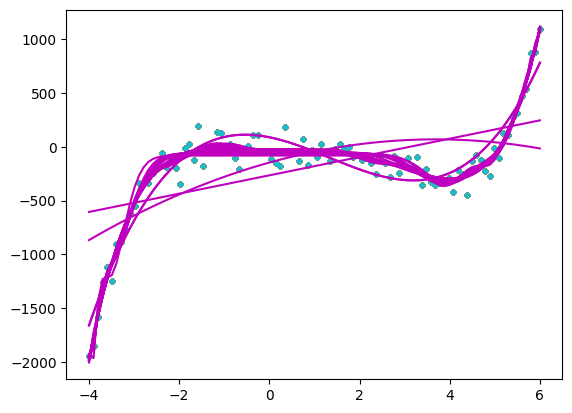

In [ ]:
for degree in range(1,31):
  polynomial_features = PolynomialFeatures(degree=degree)
  x_poly = polynomial_features.fit_transform(x)

  model = LinearRegression()
  model.fit(x_poly, y)
  y_poly_pred = model.predict(x_poly)

  rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
  r2 = r2_score(y,y_poly_pred)
  print("RMSE of degree ", degree ,": ",rmse, "*** R2 score of degree ", degree, ": ", r2)

  plt.scatter(x, y, s=10)
  # sort the values of x before line plot
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
  x, y_poly_pred = zip(*sorted_zip)
  plt.plot(x, y_poly_pred, color='m')
plt.show()


RMSE of degree  30 :  90.44402062373908 *** R2 score of degree  30 :  0.9589802407182859


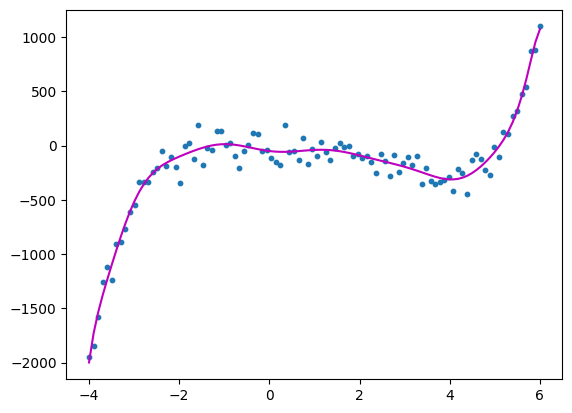

In [ ]:
polynomial_features = PolynomialFeatures(degree=15)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE of degree ", degree ,": ",rmse, "*** R2 score of degree ", degree, ": ", r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()